# Is the SED Correct?

In the circle test, the SFH is totatlly bonkers. We just can not get the correct SFH back out with MCMC. Is the MCMC getting a good fit?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
wavelengths = [3551, 4686, 6166, 7480, 8932]    # for u, g, r, i, z filters
filters = ['u', 'g', 'r', 'i', 'z']

## Input 

Text

So from:

logzsol | dust2| $\tau$| tStart| sfTrans| sfSlope
--------|------|----|-------|--------|---------
-0.5| 0.1| 0.5| 1.5| 9.0| -1.0

we get

u| g| r| i| z
-|--|--|--|--
45.36|43.76|42.99|42.67|42.39

This SED gets 25 magnitues subtracted from (`c` paramter in fit) it get it to a resonable magnitude. FSPS only calcualtes for 1 solar mass, so this factor is a scaling factor that is related to the total solar mass observed.

## Fit 1 

First we did our normal fit. The oddest part was that `logzsol` wanted the smallest value possible. This was most odd because the prior is a Gaussian centered at -0.5 (this happens to be the input value) with a width of 0.5 dex. I also have a low cut off, just cause, of -2.5. 

This fit gives us 

logzsol | dust2| $\tau$| tStart| sfTrans| sfSlope | c
--------|------|----|-------|--------|----|-----
-2.5| 0.01| 7.17| 7.94| 10.40| -5.24| -23.48

and and SED of 

u| g| r| i| z
-|--|--|--|--
43.31|42.06|41.76|41.67|41.62


## Fit 2

I changed the low cut off, in part becasue nothing else seemed to effect the metalicity paramter fit. With it now set at no lower then -1.0 the fit gives us:

logzsol | dust2| $\tau$| tStart| sfTrans| sfSlope | c
--------|------|----|-------|--------|----|-----
-1.0| 0.25| 5.67| 1.94| 4.93| 1.64| -22.85

and and SED of 

u| g| r| i| z
-|--|--|--|--
42.28|41.43|41.23|41.01|40.99

## Fit 3

Finally I "fixed" the metalicity to the known value of -0.5, because these previouse fits just still did not want to get things correct. This fit gives us:

logzsol | dust2| $\tau$| tStart| sfTrans| sfSlope | c
--------|------|----|-------|--------|----|-----
-0.51| 0.32| 8.17| 8.42| 10.76| 4.72| -22.17

and and SED of 

u| g| r| i| z
-|--|--|--|--
41.53|40.70|40.55|40.33|40.30


**None** of these are correct. 

In [1]:
input_sed = np.array([45.36, 43.76, 42.99, 42.67, 42.39])
input_c = -25
fit1_sed = np.array([43.31, 42.06, 41.76, 41.67, 41.62])
fit1_c = -23.48
fit2_sed = np.array([42.28, 41.43, 41.23, 41.01, 40.99])
fit2_c = -22.85
fit3_sed = np.array([41.53, 40.70, 40.55, 40.33, 40.30])
fit3_c = -22.1

In [17]:
plt.figure('fit test')

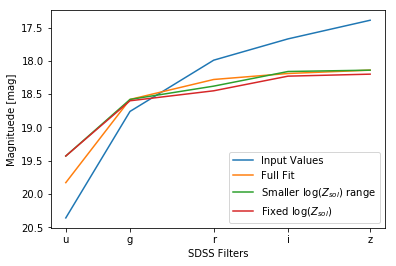

In [25]:
fig, ax = plt.subplots(1,1) 

ax.plot(wavelengths, input_sed+input_c, label='Input Values')
# ax.plot(wavelengths, [20.36, 18.76, 17.99, 17.67, 17.39])  # the in text file numbers.
ax.plot(wavelengths, fit1_sed+fit1_c, label='Full Fit')
ax.plot(wavelengths, fit2_sed+fit2_c, label='Smaller $\log(Z_{sol})$ range')
ax.plot(wavelengths, fit3_sed+fit3_c, label='Fixed $\log(Z_{sol})$')

plt.gca().invert_yaxis()
ax.set_xticks(wavelengths)
ax.set_xticklabels(filters)
ax.set_xlabel('SDSS Filters')
ax.set_ylabel('Magnitude [mag]')

plt.legend()
# plt.savefig('2017-08-09- not getting correct sed.pdf')
plt.show()

# Check Newer Resutls

On 2017-08-24 I re-ran the whole analaysis method and it got a closer answer on the circle test (particually with the log(Z_sol)) but it was not perfect. Here I want to compare the SED outputed results.

In [17]:
fit0824_sed = np.array([42.29, 41.43, 41.21, 40.98, 40.93])
fit0824_c = -25.70

In [15]:
plt.figure('newer fit test')

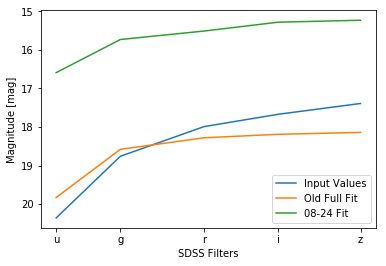

In [19]:
fig, ax = plt.subplots(1,1) 

ax.plot(wavelengths, input_sed+input_c, label='Input Values')
# ax.plot(wavelengths, [20.36, 18.76, 17.99, 17.67, 17.39])  # the in text file numbers.
ax.plot(wavelengths, fit1_sed+fit1_c, label='Old Full Fit')
ax.plot(wavelengths, fit0824_sed+fit0824_c, label='08-24 Fit')

plt.gca().invert_yaxis()
ax.set_xticks(wavelengths)
ax.set_xticklabels(filters)
ax.set_xlabel('SDSS Filters')
ax.set_ylabel('Magnitude [mag]')

plt.legend()
plt.savefig('2017-09-05 not getting correct sed.pdf')
plt.show()